<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# **PART 1** #

Text(0.5, 1.0, 'Boxplot of Median Value of Owner-Occupied Homes Boxplot')

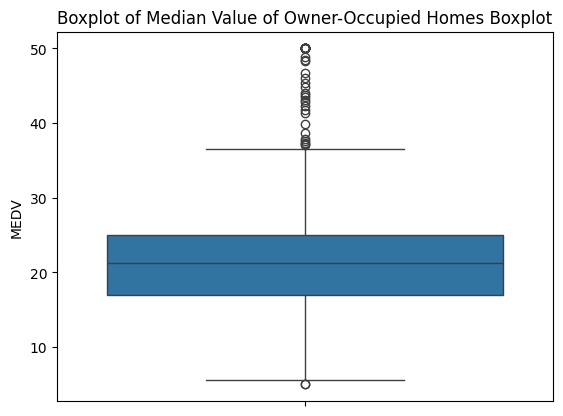

In [12]:
# For the "Median value of owner-occupied homes" provide a boxplot

ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Boxplot of Median Value of Owner-Occupied Homes Boxplot')

<AxesSubplot:title={'center':'Homes on the Charles River'}, xlabel='Off (0.0) v. on (1.0) river', ylabel='Count of homes'>

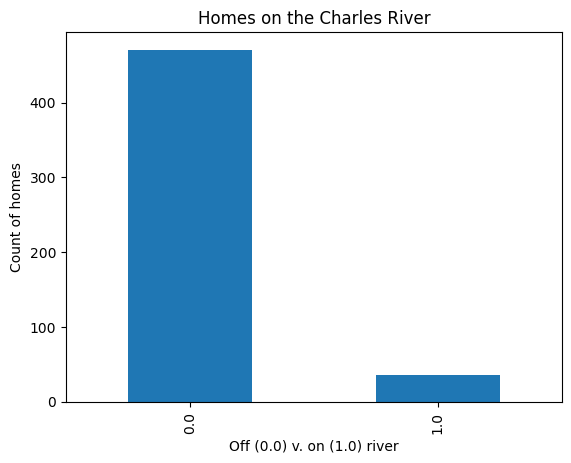

In [57]:
# Provide a  bar plot for the Charles river variable

boston_df.groupby(by=['CHAS']).CHAS.count().plot(kind='bar', title='Homes on the Charles River', ylabel='Count of homes', xlabel='Off (0.0) v. on (1.0) river')

Text(0, 0.5, 'Median home value')

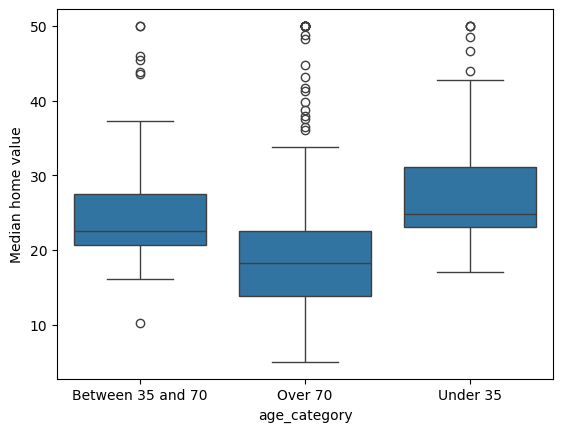

In [32]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_category'] = 'Under 35'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'age_category'] = 'Between 35 and 70'
boston_df.loc[boston_df['AGE'] > 70, 'age_category'] = 'Over 70'

ax = sns.boxplot(x='age_category', y='MEDV', data=boston_df)

# Adding y-axis label
ax.set_ylabel('Median home value')

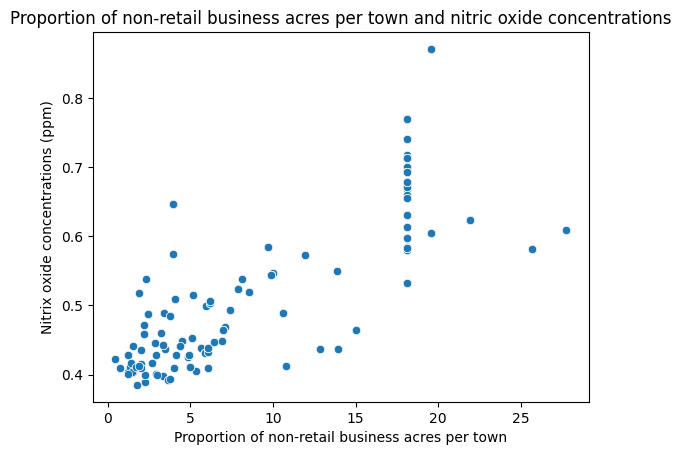

There is a positive correlation between the proportion of non-retail business acres per town and nitric oxide concentrations.


In [46]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
import matplotlib.pyplot as plt

sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

# Adding labels
plt.ylabel('Nitrix oxide concentrations (ppm)')
plt.xlabel('Proportion of non-retail business acres per town')
plt.title('Proportion of non-retail business acres per town and nitric oxide concentrations')

# Show the plot
plt.show()

print('There is a positive correlation between the proportion of non-retail business acres per town and nitric oxide concentrations.')

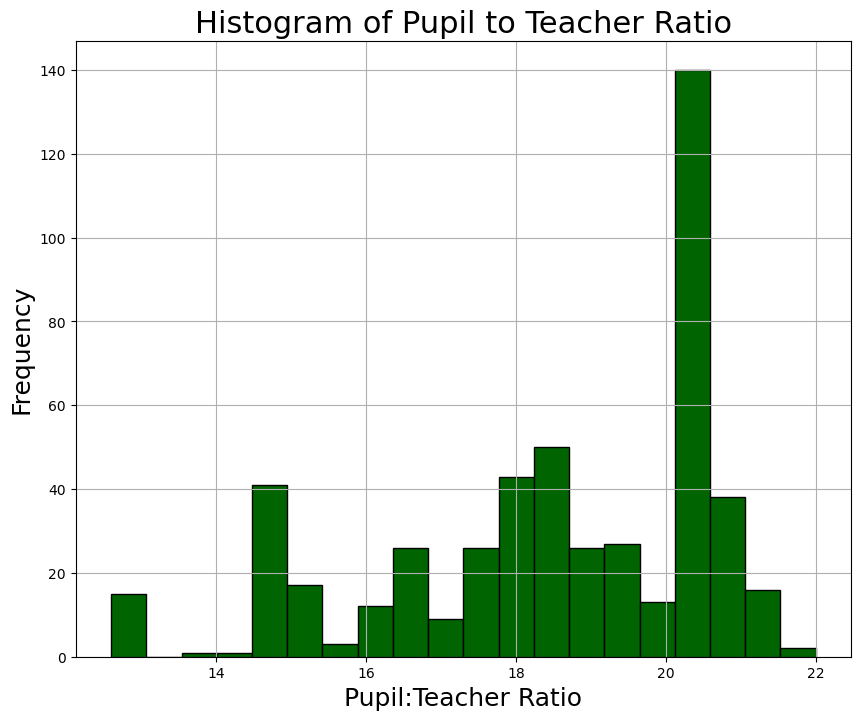

In [50]:
# Create a histogram for the pupil to teacher ratio variable

# Plot histogram
plt.figure(figsize=(10, 8)) 
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black', color='darkgreen') 

plt.xlabel('Pupil:Teacher Ratio', fontsize='18')
plt.ylabel('Frequency', fontsize='18')
plt.title('Histogram of Pupil to Teacher Ratio', fontsize='22')
plt.grid(True)
plt.show()

# **PART 2** #

In [71]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

print("Alternative hypothesis w/ alpha=0.05: There is a significant difference in median value of houses bounded by the Charles river.")

display(scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], boston_df[boston_df['CHAS'] == 1.0]['MEDV']))

print("In conclusion, yes, there is a significant difference in median value of houses bounded by the Charles river.")

Alternative hypothesis w/ alpha=0.05: There is a significant difference in median value of houses bounded by the Charles river.


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In conclusion, yes, there is a significant difference in median value of houses bounded by the Charles river.


In [102]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

print("Alternative hypothesis w/ alpha=0.05: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).")

y = boston_df['MEDV']
X = boston_df['AGE']

X1 = sm.add_constant(X)
model = sm.OLS(y, X1)

results = model.fit()
display(results.summary())

print("In conclusion, yes, there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940 given the Prob (F-statistic) is near 0.0")

Alternative hypothesis w/ alpha=0.05: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.57e-18
Time:                        10:49:44   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9787      0.999     31.006      0.000      29.016      32.942
AGE           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In conclusion, yes, there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940 given the Prob (F-statistic) is near 0.0


In [99]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
from scipy.stats import pearsonr

print("Alternative hypothesis w/ alpha=0.05: There exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson correlation coefficient:", corr_coeff)
print("p-value:", p_value)

print("In conclusion, there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town given the R value is 0.76 (which indicates a strong positive correlation).")


Alternative hypothesis w/ alpha=0.05: There exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
Pearson correlation coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98
In conclusion, there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town given the R value is 0.76 (which indicates a strong positive correlation).


In [87]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

y = boston_df['MEDV']
X = boston_df['DIS']

X1 = sm.add_constant(X)
model = sm.OLS(y, X1)

results = model.fit()
display(results.summary())
print("In conclusion, the median value of owner-occupied homes increases by 1 unit ($1000) for every 1.0916 units of weighted distance to the five Boston employment centres.")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        10:15:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In conclusion, the median value of owner-occupied homes increases by 1 unit ($1000) for every 1.0916 units of weighted distance to the five Boston employment centres.
